# WeatherPy
---------------------------------------------------

### Analysis: 
1) The first observation is that temperatures tend to be higher when citites have latitude closer to the equator.

2) Second, humidity on average tends to be higher with latitudes that are closer the equator.

3) Finally, there is no apparent correlation between cloudiness and the distance from the equator. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=


In [4]:
# Create empty lists to append the API calls
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Initialize record to one
record = 1

In [5]:
# Start print statement 
print(f'Beginning of Data Retrieval\n-----------------------------------')

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    # Keep appending lists despite missing values
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        # Replace the spaces between city names that have more than one word
        city_name_record = city.replace(" ", "%20")
        
        # Print output
        print(f'Processing Record {record} | {city}')
        print(f'{query_url}{city_name_record}')
       
        # Increase record by one
        record = record + 1
        
        # Pause loop for one second
        time.sleep(1)
        
 
    # If city is not found, skip to the next     
    except:
        print("City not found. Skipping...")


   

Beginning of Data Retrieval
-----------------------------------
Processing Record 1 | boat of garten
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=boat%20of%20garten
Processing Record 2 | jamestown
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=jamestown
Processing Record 3 | santa ana
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=santa%20ana
Processing Record 4 | itarema
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=itarema
City not found. Skipping...
Processing Record 5 | castro
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=castro
Processing Record 6 | yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=yellowknife
Processing Record 7 | bluff


Processing Record 57 | bella union
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=bella%20union
Processing Record 58 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=cabo%20san%20lucas
Processing Record 59 | aripuana
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=aripuana
Processing Record 60 | valentin gomez farias
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=valentin%20gomez%20farias
Processing Record 61 | hamilton
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=hamilton
Processing Record 62 | bongandanga
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=bongandanga
Processing Record 63 | srandakan
http://api.openweathermap.org/data/2.5/weat

Processing Record 112 | thompson
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=thompson
Processing Record 113 | sur
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=sur
Processing Record 114 | grand gaube
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=grand%20gaube
Processing Record 115 | alta floresta
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=alta%20floresta
Processing Record 116 | chuy
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=chuy
Processing Record 117 | ingham
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=ingham
Processing Record 118 | roebourne
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperi

Processing Record 168 | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=hermanus
City not found. Skipping...
Processing Record 169 | jalu
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=jalu
Processing Record 170 | bagdarin
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=bagdarin
Processing Record 171 | harrisonburg
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=harrisonburg
Processing Record 172 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=saskylakh
Processing Record 173 | sao jose da coroa grande
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=sao%20jose%20da%20coroa%20grande
Processing Record 174 | kailua
http://api.openweathermap.org

City not found. Skipping...
Processing Record 223 | raver
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=raver
Processing Record 224 | lagos
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=lagos
Processing Record 225 | hasaki
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=hasaki
Processing Record 226 | lata
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=lata
Processing Record 227 | bo phloi
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=bo%20phloi
Processing Record 228 | la ronge
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=la%20ronge
Processing Record 229 | raudeberg
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&un

Processing Record 278 | bilma
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=bilma
Processing Record 279 | fort payne
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=fort%20payne
Processing Record 280 | trairi
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=trairi
Processing Record 281 | yekaterinovka
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=yekaterinovka
Processing Record 282 | yulara
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=yulara
Processing Record 283 | grand-santi
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=grand-santi
Processing Record 284 | ende
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=i

Processing Record 333 | baykit
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=baykit
Processing Record 334 | hidalgotitlan
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=hidalgotitlan
Processing Record 335 | lasa
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=lasa
City not found. Skipping...
Processing Record 336 | kant
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=kant
Processing Record 337 | genhe
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=genhe
Processing Record 338 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=srednekolymsk
Processing Record 339 | montepuez
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b8

City not found. Skipping...
Processing Record 388 | moose factory
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=moose%20factory
Processing Record 389 | saldanha
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=saldanha
Processing Record 390 | mbaiki
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=mbaiki
Processing Record 391 | berezovyy
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=berezovyy
Processing Record 392 | podgornoye
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=podgornoye
Processing Record 393 | zharkovskiy
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=zharkovskiy
Processing Record 394 | knysna
http://api.openweathermap.org/data/2.5/weather?appi

Processing Record 443 | san cosme y damian
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=san%20cosme%20y%20damian
Processing Record 444 | moundou
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=moundou
Processing Record 445 | rock sound
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=rock%20sound
Processing Record 446 | ketchikan
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=ketchikan
Processing Record 447 | flinders
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=flinders
Processing Record 448 | springfield
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=springfield
Processing Record 449 | jati
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150

Processing Record 499 | chara
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=chara
City not found. Skipping...
Processing Record 500 | san patricio
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=san%20patricio
Processing Record 501 | kirkuk
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=kirkuk
Processing Record 502 | guozhen
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=guozhen
Processing Record 503 | juba
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=juba
Processing Record 504 | manacapuru
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c86d66ffbc&units=imperial&q=manacapuru
Processing Record 505 | beipiao
http://api.openweathermap.org/data/2.5/weather?appid=880f0f6150e45624d81b87c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a dictionary using the lists above 
cities_summary = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

# Convert dictionary into a DataFrame
weather_data = pd.DataFrame(cities_summary)

# Count values 
weather_data.count()

City          531
Cloudiness    531
Country       531
Date          531
Humidity      531
Lat           531
Lng           531
Max Temp      531
Wind Speed    531
dtype: int64

In [7]:
# Export DataFrame into a csv file
weather_data.to_csv("../Data_CSV/weather_data.csv")

# Display DataFrame
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Boat of Garten,29,GB,1563658668,77,57.25,-3.76,60.80,11.41
1,Jamestown,2,AU,1563658547,97,-33.21,138.60,44.98,7.00
2,Santa Ana,41,MX,1563658654,32,30.54,-111.12,100.99,1.01
3,Itarema,80,BR,1563658672,78,-2.92,-39.92,76.66,10.02
4,Castro,90,CL,1563658458,100,-42.48,-73.76,41.00,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

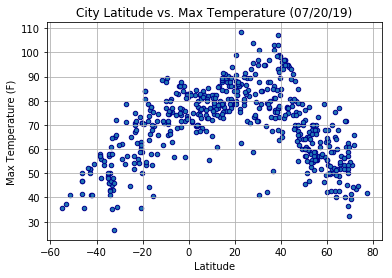

In [8]:
# Create a scatter plot based on weather_data DataFrame
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", edgecolors="darkblue", s=20)

# Set the title
plt.title(("City Latitude vs. Max Temperature (%s)" % time.strftime("%x")))

# Add axes labels 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Add grid
plt.grid()

# Save figure
plt.savefig("../Plots/lat_temp.png")

# Display scatter plot
plt.show()

#### Latitude vs. Humidity Plot

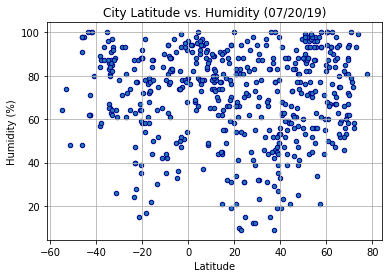

In [9]:
# Create a scatter plot based on weather_data DataFrame
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o",edgecolors="darkblue", s=20)

# Set the title
plt.title(("City Latitude vs. Humidity (%s)" % time.strftime("%x")))

# Add axes labels 
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add grid
plt.grid()

# Save figure
plt.savefig("../Plots/lat_humidity.png")

# Display scatter plot
plt.show()

#### Latitude vs. Cloudiness Plot

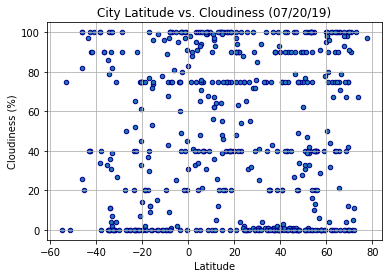

In [10]:
# Create a scatter plot based on weather_data DataFrame
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o",edgecolors="darkblue", s=20)

# Set the title
plt.title(("City Latitude vs. Cloudiness (%s)" % time.strftime("%x")))

# Add axes labels 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Add grid
plt.grid()

# Save figure
plt.savefig("../Plots/lat_cloudiness.png")

# Display scatter plot
plt.show()

#### Latitude vs. Wind Speed Plot

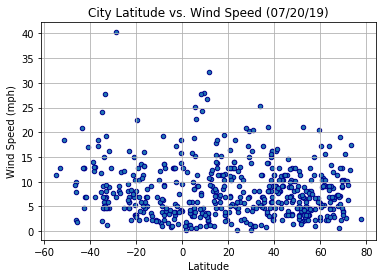

In [11]:
# Create a scatter plot based on weather_data DataFrame
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o",edgecolors="darkblue", s=20)

# Set the title
plt.title(("City Latitude vs. Wind Speed (%s)" % time.strftime("%x")))

# Add axes labels 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Add grid
plt.grid()

# Save figure
plt.savefig("../Plots/lat_wind.png")

# Display scatter plot
plt.show()